Please run those two cells before running the Notebook!

As those plotting settings are standard throughout the book, we do not show them in the book every time we plot something.

In [9]:
# %matplotlib inline
%config InlineBackend.figure_format = "retina"

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid", 
              palette="colorblind", color_codes=True, 
              rc={"figure.figsize": [12, 8]})

# Chapter 2 - Data Preprocessing

데이터 과학 업계에서는 데이터 과학자가 전체 시간의 약 80%를 데이터를 얻고, 처리하고, 정리하는 데 사용한다고 흔히 말합니다. 그리고 나서 남은 20%의 시간만 실제로 모델링에 사용되며, 이 부분이 종종 가장 흥미로운 부분으로 간주됩니다. 이전 장에서는 다양한 출처에서 데이터를 다운로드하는 방법을 이미 배웠습니다. 이제 데이터를 통해 실제로 통찰력을 도출하기 전에 몇 가지 단계를 거쳐야 합니다. 이 장에서는 데이터 전처리, 즉 데이터를 사용하기 전에 적용되는 일반적인 정리 및 조작을 다룹니다. 목표는 모델의 성능을 향상시키는 것뿐만 아니라 해당 데이터를 기반으로 한 분석의 타당성을 보장하는 것입니다. 이 장에서는 금융 시계열 데이터를 중심으로 다루며, 다음 장에서는 다른 유형의 데이터를 다루는 방법도 보여드리겠습니다. 이 장에서는 다음과 같은 작업을 다룹니다:

1. 가격을 수익률로 변환하기
2. 인플레이션에 따른 수익률 조정
3. 시계열 데이터의 주기 변경
4. 결측 데이터를 보완하는 다양한 방법
5. 통화 변환
6. 거래 데이터를 집계하는 다양한 방법

## 2.1 Converting prices to returns

**가격을 수익률로 변환하기**

시계열 모델링에 사용되는 많은 모델과 접근법은 시계열이 정상성을 가져야 한다고 요구합니다. 정상성(stationarity)은 시간에 따라 시계열의 평균과 분산 같은 통계적 특성이 변하지 않는 것을 의미합니다. 이 가정 하에 우리는 미래의 값을 예측하는 모델을 구축할 수 있습니다. 그러나 자산 가격은 일반적으로 비정상적(non-stationary)입니다. 자산 가격의 통계적 특성은 시간에 따라 변할 뿐만 아니라, 트렌드(시간에 따른 일반적인 패턴)나 계절성(일정한 시간 간격으로 반복되는 패턴)도 관찰됩니다. 가격을 수익률로 변환함으로써 시계열을 정상적으로 만들려는 시도를 합니다.

수익률을 사용하는 또 다른 이점은 **정규화**입니다. 수익률을 사용하면 서로 다른 수익률 시계열을 쉽게 비교할 수 있습니다. 반면에 원래 주가를 비교하는 것은 복잡합니다. 예를 들어, 한 주식은 $10에 시작하고 다른 주식은 $1,000에 시작할 수 있기 때문입니다.

수익률에는 두 가지 유형이 있습니다:

1. **단순 수익률 (Simple returns)**: 자산에 걸쳐 집계됩니다. 포트폴리오의 단순 수익률은 포트폴리오에 있는 개별 자산의 수익률의 가중 합계입니다. 단순 수익률은 다음과 같이 정의됩니다:
   $
   R_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1
   $

2. **로그 수익률 (Log returns)**: 시간에 걸쳐 집계됩니다. 예를 들어, 특정 월의 로그 수익률은 해당 월의 일일 로그 수익률의 합계입니다. 로그 수익률은 다음과 같이 정의됩니다:
   $
   r_t = \log\left(\frac{P_t}{P_{t-1}}\right) = \log(P_t) - \log(P_{t-1})
   $
   여기서 $ P_t $는 시간 $ t $에 자산의 가격을 의미합니다.

위의 경우, 배당금을 고려하지 않았습니다. 배당금은 수익률에 영향을 미치므로 공식에 약간의 수정이 필요합니다. 주식 가격을 다룰 때는 주식 분할과 같은 기업 활동을 고려한 조정 값을 사용하는 것이 최선의 방법입니다.

일반적으로, 로그 수익률은 단순 수익률보다 선호됩니다. 그 이유는 주식 가격이 로그 정규 분포를 따른다고 가정할 경우(특정 시계열에서 항상 그런 것은 아니지만), 로그 수익률은 정규 분포를 따르게 되기 때문입니다. 정규 분포는 고전적인 통계적 접근법에서 잘 작동합니다. 또한, 일일/장중 데이터의 경우 단순 수익률과 로그 수익률의 차이는 매우 작으며, 일반적으로 로그 수익률이 단순 수익률보다 작습니다.

아래 예제에서는 Apple의 주가를 사용하여 두 가지 유형의 수익률을 계산하는 방법을 보여줍니다.

### How to do it...

Execute the following steps to download Apple’s stock prices and calculate simple/log returns: Import the libraries:

1. Import the libraries:

In [1]:
import pandas as pd 
import numpy as np
import yfinance as yf

2. Download the data and keep the adjusted close prices only:
- **2단계에서는** Yahoo Finance에서 가격 데이터를 다운로드하고, 수익률 계산을 위해 조정 종가만 남겼습니다. 

In [2]:
df = yf.download("AAPL", 
                 start="2010-01-01", 
                 end="2020-12-31",
                 progress=False)

df = df.loc[:, ["Adj Close"]]

3. Convert adjusted close prices to simple and log returns:

- **단순 수익률**을 계산하기 위해, pandas의 Series/DataFrame의 `pct_change` 메서드를 사용했습니다. 이 메서드는 현재 요소와 이전 요소 간의 퍼센트 변화를 계산합니다(지연된 값의 수를 지정할 수 있지만, 이 경우 기본값인 1이 충분합니다). 이전 요소는 주어진 행의 위에 있는 행으로 정의됩니다. **시계열 데이터**를 다룰 때, 데이터가 시간 인덱스에 따라 정렬되어 있는지 확인해야 합니다.
- **로그 수익률**을 계산하기 위해, 이 레시피의 소개에서 제공된 공식을 따랐습니다. 시리즈의 각 요소를 지연된 값으로 나눌 때, `shift` 메서드에 1을 입력하여 이전 요소에 접근했습니다. 마지막으로, 나눈 값에 대해 `np.log` 함수를 사용하여 자연 로그를 취했습니다.

In [3]:
df["simple_rtn"] = df["Adj Close"].pct_change()
df["log_rtn"] = np.log(df["Adj Close"]/df["Adj Close"].shift(1))

4. Inspect the output:

In [4]:
df.head()

,Adj Close,simple_rtn,log_rtn
Date,,,
2010-01-04,6.461977,NaN,NaN
2010-01-05,6.473149,0.001729,0.001727
2010-01-06,6.370185,-0.015906,-0.016034
2010-01-07,6.358409,-0.001849,-0.001850
2010-01-08,6.400681,0.006648,0.006626


The first row will always contain a NaN (not a number) value, as there is no previous price to use for calculating the returns.

## 2.2 Adjusting the returns for inflation

**인플레이션을 고려한 수익률 조정**

다양한 종류의 분석, 특히 장기적인 분석을 수행할 때 인플레이션을 고려하는 것이 좋습니다. 인플레이션은 시간이 지남에 따라 경제의 물가 수준이 일반적으로 상승하는 것을 의미합니다. 다시 말해, 돈의 구매력 감소를 나타냅니다. 이러한 이유로, 우리는 회사의 성장이나 발전으로 인한 주가 상승에서 인플레이션을 분리하고자 할 수 있습니다.

우리는 주가를 직접 조정할 수 있지만, 이 레시피에서는 수익률을 조정하여 실질 수익률을 계산하는 것에 중점을 둘 것입니다. 이를 위해 다음 공식을 사용할 수 있습니다:

$
R_t^r = \frac{1 + R_t}{1 + \pi_t} - 1
$

여기서 $ R_t^r $는 실질 수익률, $ R_t $는 시간 $ t $에서의 단순 수익률, 그리고 $ \pi_t $는 인플레이션율을 나타냅니다.

이 예제에서는 Apple의 주가를 사용하여 2010년부터 2020년까지의 데이터를 다룹니다 (이전 레시피에서 다운로드한 것과 동일한 방식으로).

### How to do it...

Execute the following steps to adjust the returns for inflation:

0. Recreating the steps from the previous recipe:

In [106]:
import yfinance as yf

df = yf.download("AAPL", 
                 start="2010-01-01", 
                 end="2020-12-31",
                 progress=False)

df = df.loc[:, ["Adj Close"]]

1. Import libraries and authenticate:

- **라이브러리 임포트 및 인증**: 먼저, 필요한 라이브러리를 임포트하고 Nasdaq Data Link와의 인증을 완료했습니다. 이를 통해 인플레이션 관련 데이터를 다운로드할 수 있게 되었습니다.
- 해당 라이브러리가 작동하지 않아, Fred 사용

In [107]:
import pandas as pd
import os

In [108]:
# import nasdaqdatalink
# nasdaqdatalink.ApiConfig.api_key = os.environ.get('NASDAQ_API_KEY')

In [109]:
from fredapi import Fred

# 환경변수에서 API 키 가져오기
fred = Fred(api_key=os.getenv('FRED_API_KEY'))

2. Resample daily prices to monthly:

- **주가 데이터 리샘플링**: 인플레이션 데이터는 월별로 제공되기 때문에 Apple의 주가 데이터를 월간 주기로 리샘플링했습니다. 이 과정에서 `resample` 메서드와 `last` 메서드를 사용하여 각 월의 마지막 주가를 선택했습니다.

In [110]:
df = df.resample("ME").last()
df

,Adj Close
Date,
2010-01-31,5.799202
2010-02-28,6.178448
2010-03-31,7.095762
2010-04-30,7.883544
2010-05-31,7.756423
...,...
2020-08-31,126.249634
2020-09-30,113.305725
2020-10-31,106.506012


3. Download inflation data from Nasdaq Data Link:

- **CPI 데이터 다운로드**: 3단계에서는 Nasdaq Data Link에서 월간 소비자물가지수(CPI) 데이터를 다운로드했습니다. CPI는 식료품, 교통 등 소비재와 서비스의 가격을 가중 평균하여 계산하는 중요한 경제 지표입니다.
- Nasdaq Data Link 의 아래 코드가 정상 작동하지 않아, Fred 데이터 다운 로드

In [53]:
# df_cpi = (
#     nasdaqdatalink.get(dataset="USCPI", 
#                        start_date="2009-12-01", 
#                        end_date="2020-12-31")
#     .rename(columns={"Value": "cpi"})
# )

In [111]:
# FRED에서 CPI 데이터 가져오기
cpi_data = fred.get_series('CPIAUCSL', observation_start='2010-01-01', observation_end='2020-12-31')
cpi_data

2010-01-01    217.488
2010-02-01    217.281
2010-03-01    217.353
2010-04-01    217.403
2010-05-01    217.290
               ...   
2020-08-01    259.366
2020-09-01    259.951
2020-10-01    260.249
2020-11-01    260.895
2020-12-01    262.005
Length: 132, dtype: float64

In [112]:
# 시계열 데이터를 데이터프레임으로 변환하고 "cpi"로 열 이름 변경
df_cpi = pd.DataFrame(cpi_data, columns=["cpi"])

# 인덱스를 날짜로 설정하고 이름을 "date"로 변경
df_cpi.index = pd.to_datetime(df_cpi.index)
df_cpi.index.name = 'Date'

In [113]:
df_cpi

,cpi
Date,
2010-01-01,217.488
2010-02-01,217.281
2010-03-01,217.353
2010-04-01,217.403
2010-05-01,217.290
...,...
2020-08-01,259.366
2020-09-01,259.951
2020-10-01,260.249


In [114]:
df_cpi = df_cpi.resample("ME").last()
df_cpi

,cpi
Date,
2010-01-31,217.488
2010-02-28,217.281
2010-03-31,217.353
2010-04-30,217.403
2010-05-31,217.290
...,...
2020-08-31,259.366
2020-09-30,259.951
2020-10-31,260.249


4. Join inflation data to prices:

- **데이터 병합**: `left join`을 사용하여 Apple 주가 데이터와 CPI 데이터를 병합했습니다. `left join`은 왼쪽 테이블의 모든 행과 오른쪽 테이블에서 일치하는 행을 반환하며, 일치하지 않는 행은 빈 상태로 남겨둡니다. 기본적으로 테이블의 인덱스를 사용해 조인을 수행하지만, 필요시 `on` 인수를 사용하여 특정 열을 지정할 수도 있습니다.

In [115]:
df = df.join(df_cpi, how="left")
df

,Adj Close,cpi
Date,,
2010-01-31,5.799202,217.488
2010-02-28,6.178448,217.281
2010-03-31,7.095762,217.353
2010-04-30,7.883544,217.403
2010-05-31,7.756423,217.290
...,...,...
2020-08-31,126.249634,259.366
2020-09-30,113.305725,259.951
2020-10-31,106.506012,260.249


5. Calculate simple returns and inflation rate:

- **수익률 및 인플레이션율 계산**: 병합된 데이터프레임에서 `pct_change` 메서드를 사용하여 단순 수익률과 인플레이션율을 계산했습니다.

In [116]:
df["simple_rtn"] = df["Adj Close"].pct_change()
df["inflation_rate"] = df["cpi"].pct_change()

6. Adjust the returns for inflation:

- **실질 수익률 계산**: 마지막으로, 앞서 소개된 공식을 사용하여 실질 수익률을 계산했습니다.

In [117]:
df["real_rtn"] = (
    (df["simple_rtn"] + 1) / (df["inflation_rate"] + 1) - 1
)
df.head()

,Adj Close,cpi,simple_rtn,inflation_rate,real_rtn
Date,,,,,
2010-01-31,5.799202,217.488,NaN,NaN,NaN
2010-02-28,6.178448,217.281,0.065396,-0.000952,0.066411
2010-03-31,7.095762,217.353,0.148470,0.000331,0.148090
2010-04-30,7.883544,217.403,0.111022,0.000230,0.110766
2010-05-31,7.756423,217.290,-0.016125,-0.000520,-0.015613


### There's more

- We have already explored how to download the inflation data from Nasdaq Data Link. Alternatively, we can use a handy library called cpi.

1. Import the library:

In [120]:
# !pip install cpi

In [121]:
import cpi

-  in the case of seeing the `StaleDataWarning: CPI data is out of date`

In [122]:
cpi.update()

2. Obtain the default CPI series:

- 여기에서는 기본 CPI 지수(CUUR0000SA0: 미국 도시 평균의 모든 품목, 모든 도시 소비자, 계절 조정되지 않은)를 다운로드합니다. 이 지수는 대부분의 경우에 적합합니다. 또한, `items`와 `area` 인수를 제공하여 보다 맞춤형 시리즈를 다운로드할 수도 있습니다. 특정 CPI 시리즈를 다운로드하려면 `get_by_id` 함수를 사용할 수도 있습니다.

In [123]:
cpi_series = cpi.series.get()
cpi_series

<Series: CUUR0000SA0: All items in U.S. city average, all urban consumers, not seasonally adjusted>

In [124]:
print(cpi_series)

CUUR0000SA0: All items in U.S. city average, all urban consumers, not seasonally adjusted


3. Convert the object into a `pandas` DataFrame:

In [125]:
df_cpi_2 = cpi_series.to_dataframe()

4. Filter the DataFrame and view the top 12 observations:

- **필터링 및 비교**: 이전에 Nasdaq Data Link에서 다운로드한 데이터와 비교하기 위해 2010년 이후의 월간 데이터만 남기고 필터링했습니다. `query` 메서드를 사용하여 이 작업을 수행했습니다.
- **선택된 열 및 관측값 표시**: 비교를 위해 두 개의 열만 선택하고, 첫 12개의 관측값만 표시했습니다.
- **`cpi` 라이브러리 사용 예정**: 이후 장에서는 `cpi` 라이브러리를 사용하여 `inflate` 함수를 통해 가격을 인플레이션 조정하는 방법을 다룰 것입니다.

In [126]:
df_cpi_2.query("period_type == 'monthly' and year >= 2010") \
        .loc[:, ["date", "value"]] \
        .set_index("date") \
        .head(12)

,value
date,
2010-01-01,216.687
2010-02-01,216.741
2010-03-01,217.631
2010-04-01,218.009
2010-05-01,218.178
2010-06-01,217.965
2010-07-01,218.011
2010-08-01,218.312
2010-09-01,218.439


- **`cpi` 라이브러리 GitHub 저장소**: `cpi` 라이브러리의 GitHub 저장소는 [여기](https://github.com/palewire/cpi)에서 확인할 수 있습니다.

## 2.3 Changing the frequency of time series data

**시계열 데이터의 주기 변경**

시계열 데이터, 특히 금융 데이터를 다룰 때, 데이터의 주기(빈도)를 변경해야 하는 경우가 종종 있습니다. 예를 들어, 일일 OHLC(시가, 고가, 저가, 종가) 가격 데이터를 받았지만, 알고리즘은 주간 데이터를 사용해야 할 수 있습니다. 또는 일일 대체 데이터를 보유하고 있으며, 이를 장중 실시간 데이터와 일치시키고 싶을 수 있습니다.

주기를 변경할 때 일반적으로 다음과 같은 규칙을 따릅니다:

1. 로그 수익률을 변경하려면 주기의 개수로 곱하거나 나눕니다.
2. 변동성을 변경하려면 주기의 개수의 제곱근으로 곱하거나 나눕니다.

> 독립적인 증가를 갖는 프로세스(예: 기하 브라운 운동)의 경우, 로그 수익률의 분산은 시간에 비례합니다. 예를 들어, $ r_{t3} - r_{t1} $의 분산은 $ r_{t2}−r_{t1} $와 $ r_{t3}−r_{t2} $의 두 분산의 합이 됩니다. 여기서 $ t1 ≤ t2 ≤ t3 $이라고 가정합니다. 이러한 경우, 프로세스의 매개변수가 시간에 따라 변하지 않는다고 가정할 때(동질성), 분산이 시간 간격의 길이에 비례하게 됩니다. 이는 실제로 변동성(표준 편차)이 시간의 제곱근에 비례한다는 것을 의미합니다.

이 레시피에서는 Apple의 일일 수익률을 사용하여 월별 실현 변동성을 계산한 다음, 이를 연간화하는 예제를 제시합니다. 투자 성과를 위험 조정하여 평가할 때 연간화된 변동성을 자주 접할 수 있습니다.


실현 변동성(Realized Volatility)의 공식은 다음과 같습니다:

$
RV = \sqrt{\sum_{i=1}^{T} r_t^2}
$

**실현 변동성**은 장중 수익률을 사용하여 일일 변동성을 계산할 때 자주 사용됩니다.

**우리가 취해야 할 단계는 다음과 같습니다:**

- 데이터를 다운로드하고 로그 수익률을 계산합니다.
- 월별 실현 변동성을 계산합니다.
- 월별 값을 연간화하기 위해 $\sqrt{12}$를 곱합니다.

### Getting ready 

이전 레시피의 지침을 따라, 단일 log_rtn 열과 타임스탬프를 인덱스로 가진 DataFrame인 df를 가지고 있다고 가정합니다.

### How to do it...

- Execute the following steps to calculate and annualize the monthly realized volatility:

0. Obtain the log returns in case of starting in this recipe:

In [5]:
import pandas as pd 
import yfinance as yf
import numpy as np

# download data 
df = yf.download("AAPL", 
                 start="2000-01-01", 
                 end="2010-12-31", 
                 auto_adjust=False,
                 progress=False)

# keep only the adjusted close price
df = df.loc[:, ["Adj Close"]] \
       .rename(columns={"Adj Close": "adj_close"})

# calculate simple returns
df["log_rtn"] = np.log(df["adj_close"]/df["adj_close"].shift(1))

# remove redundant data
df = df.drop("adj_close", axis=1) \
       .dropna(axis=0)

df.head()

,log_rtn
Date,
2000-01-04,-0.088078
2000-01-05,0.014528
2000-01-06,-0.090514
2000-01-07,0.046281
2000-01-10,-0.017744


1. Import the libraries:

In [6]:
import pandas as pd 
import numpy as np

2. Define the function for calculating the realized volatility:

보통은 pandas DataFrame의 `resample` 메서드를 사용할 수 있습니다. 예를 들어, 월별 평균 수익률을 계산하려면 `df["log_rtn"].resample("M").mean()`을 사용할 수 있습니다. `resample` 메서드를 사용하면 pandas의 내장 집계 함수인 `mean`, `sum`, `min`, `max` 등을 사용할 수 있습니다.

하지만, 현재 상황은 조금 더 복잡하여, 먼저 `realized_volatility`라는 보조 함수를 정의했습니다. 

In [12]:
def realized_volatility(x):
    return np.sqrt(np.sum(x**2, axis=0))

3. Calculate monthly realized volatility:

커스텀 함수로 집계를 수행하고자 했기 때문에, `resample`의 동작을 `groupby`, `Grouper`, `apply`의 조합으로 재현했습니다. 결과의 가장 기본적인 시각화를 제시했습니다(시계열 시각화에 대한 정보는 3장 '금융 시계열 시각화'를 참조하세요).

In [15]:
df_rv = (
    df.groupby(pd.Grouper(freq="ME"))
    .apply(realized_volatility)
    .rename(columns={"log_rtn": "rv"})
)
df_rv

,rv
Date,
2000-01-31,0.236246
2000-02-29,0.147841
2000-03-31,0.243591
2000-04-30,0.212513
2000-05-31,0.184990
...,...
2010-08-31,0.060304
2010-09-30,0.065953
2010-10-31,0.069618


- **`df.groupby(pd.Grouper(freq="M"))`**:
   - `pd.Grouper(freq="M")`는 데이터를 월별로 그룹화하기 위해 사용됩니다. 즉, `df` 데이터프레임의 `log_rtn` 열을 각 월별로 그룹화합니다.
   - `groupby` 메서드를 사용하여 이 월별 그룹을 만듭니다. 예를 들어, 2000년 1월의 모든 일일 로그 수익률이 하나의 그룹으로 묶이고, 2000년 2월의 데이터는 또 다른 그룹이 됩니다.

- **`.apply(realized_volatility)`**:
   - 이 부분은 각 그룹에 대해 `realized_volatility` 함수를 적용합니다. 
   - `realized_volatility` 함수는 로그 수익률의 제곱 합을 계산한 후 제곱근을 취해 실현 변동성을 계산합니다. 
   - 이 함수는 월별 로그 수익률의 변동성을 나타내며, 월 단위로 계산됩니다.

- **`.rename(columns={"log_rtn": "rv"})`**:
   - `apply` 메서드가 반환한 결과는 기본적으로 각 그룹의 `log_rtn` 값을 기준으로 계산된 결과입니다. 
   - 결과의 열 이름을 `"rv"`(realized volatility)로 변경합니다.
   - 하지만 여기서 주의할 점은, `rename` 메서드는 그룹화 후 반환된 결과가 데이터프레임일 때 작동합니다. 실제로 이 코드에서는 반환된 결과가 `Series` 객체이기 때문에 `rename(columns={"log_rtn": "rv"})` 대신 `rename("rv")` 또는 `rename_axis("rv")`를 사용하는 것이 올바릅니다.

따라서, 이 코드의 최종 결과는 각 월별 실현 변동성이 계산된 `df_rv`라는 새로운 시계열 데이터프레임이 됩니다. 이 데이터프레임은 각 월의 시작일을 인덱스로 가지며, 해당 월의 실현 변동성을 나타내는 값을 포함합니다.

4. Annualize the values:

In [16]:
df_rv.rv = df_rv["rv"] * np.sqrt(12)

5. Plot the results:

실현 변동성(realized volatility)의 급등이 일부 극단적인 수익률(이상치일 가능성이 있음)과 일치하는 것을 확인할 수 있습니다.

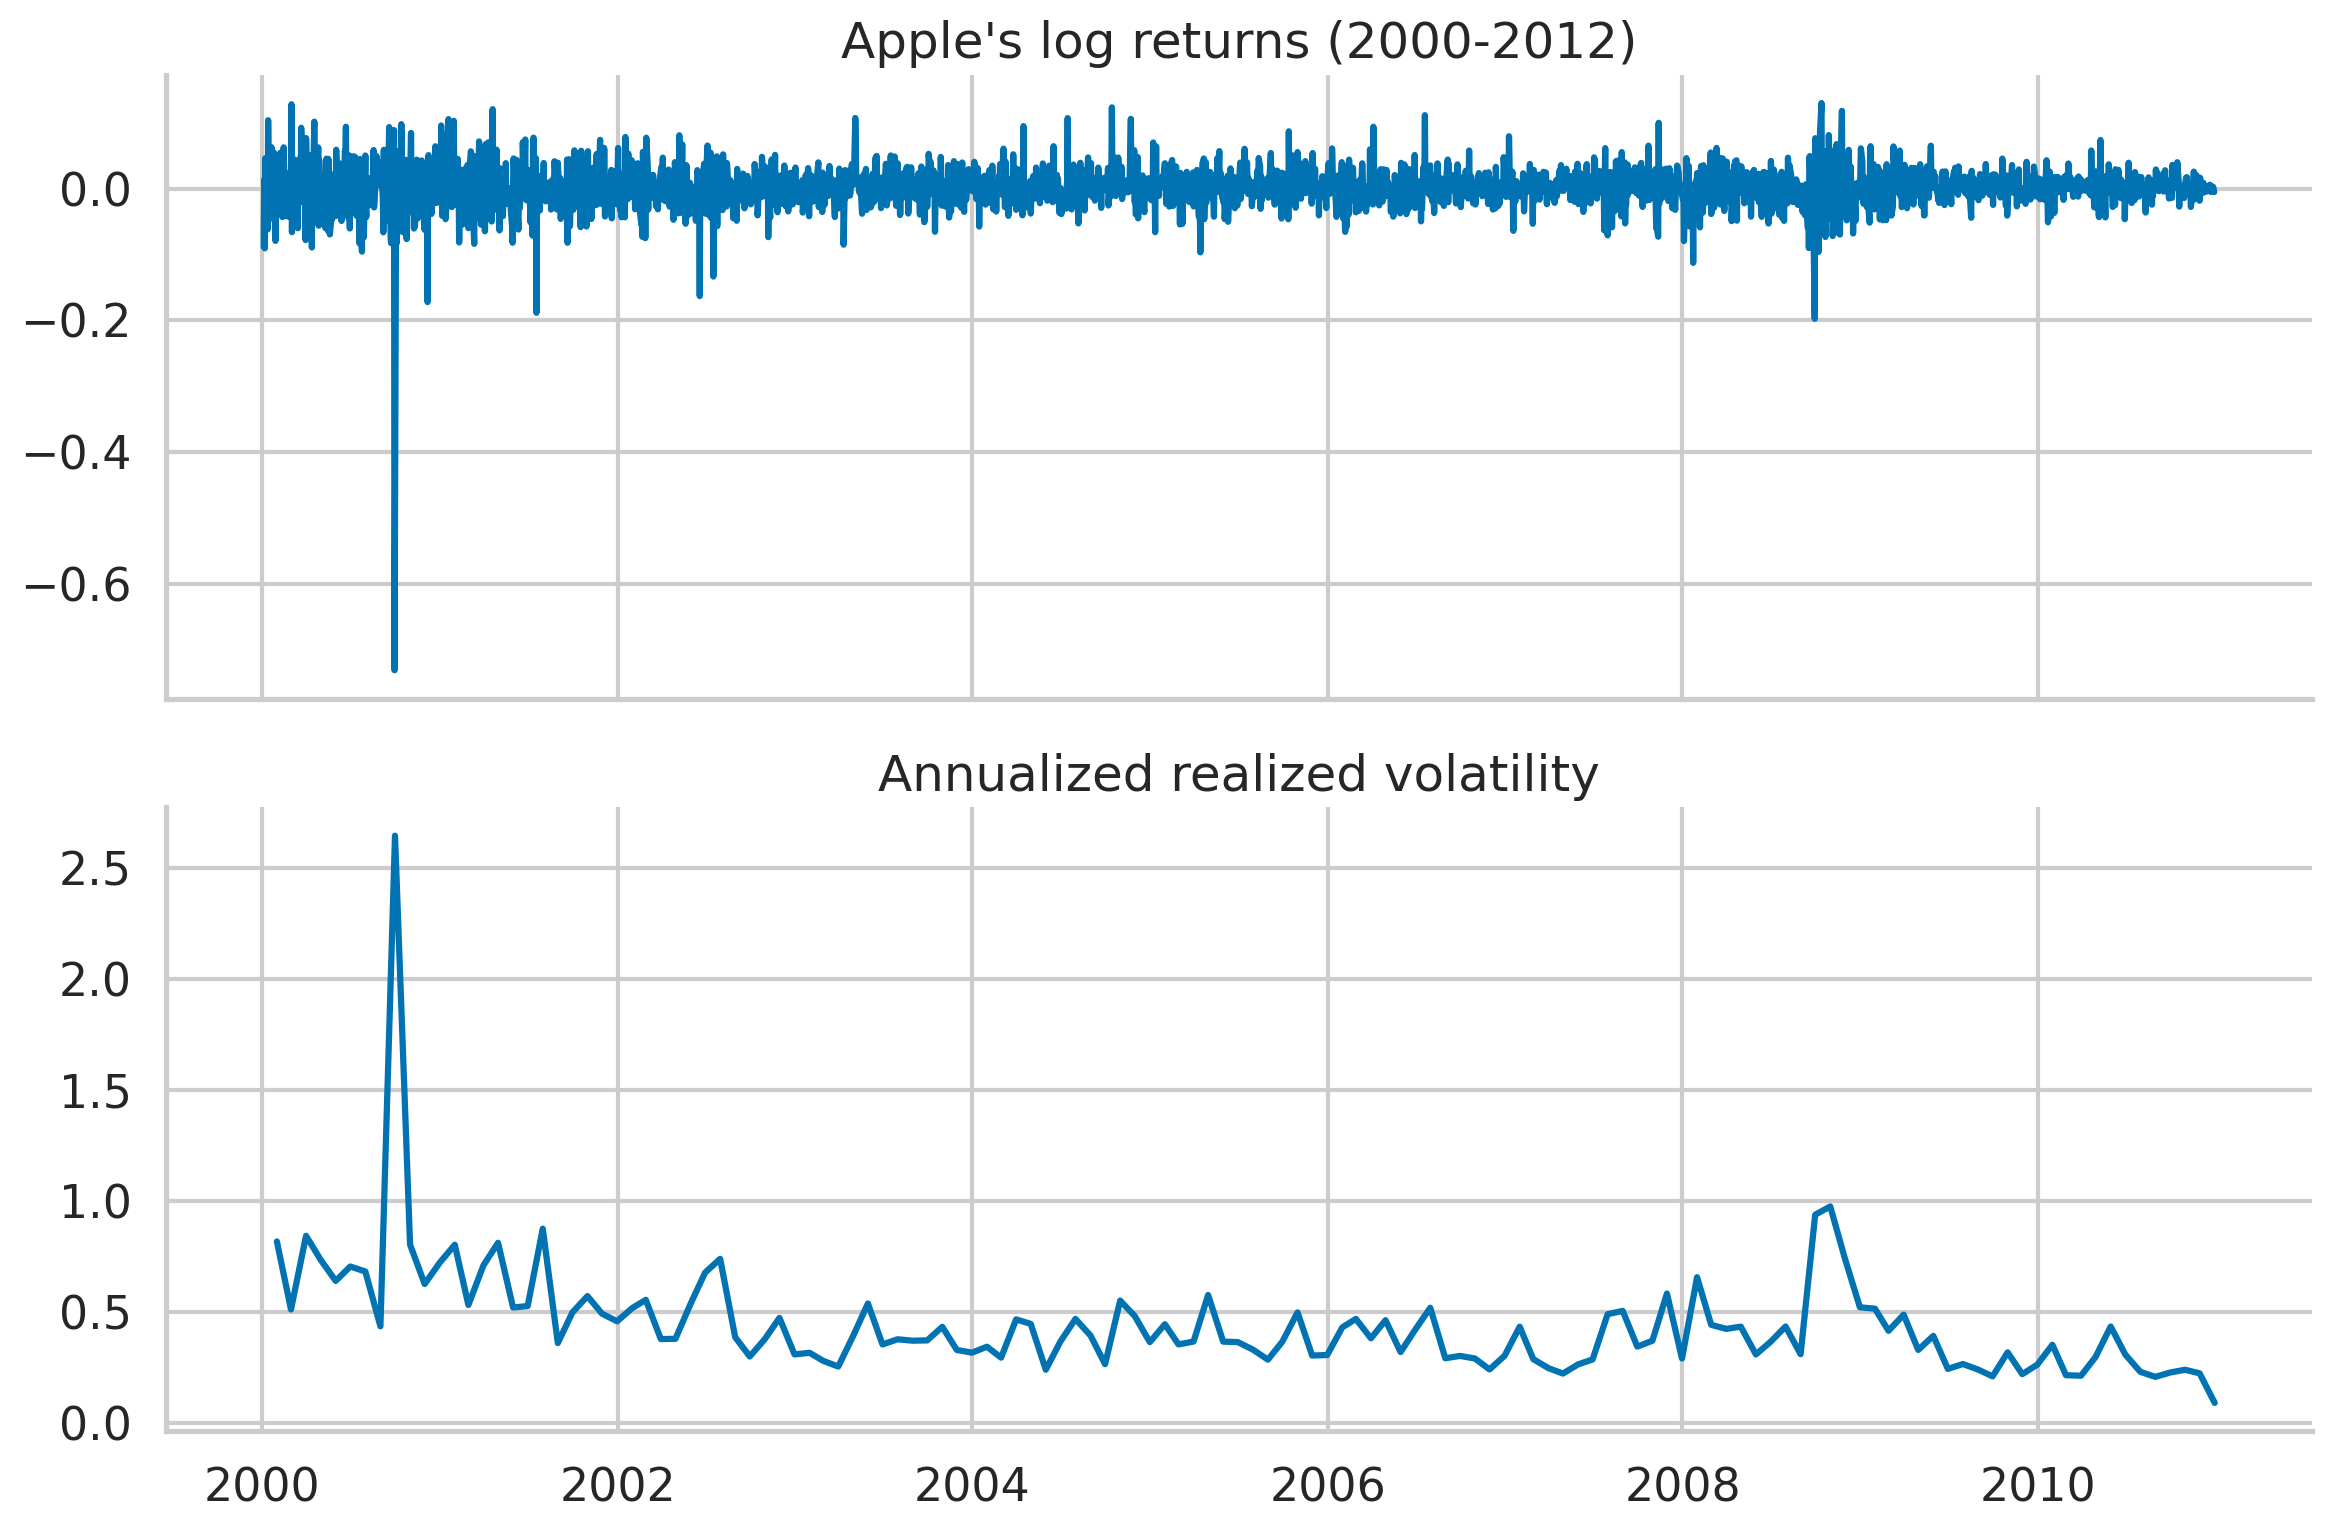

In [20]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df)
ax[0].set_title("Apple's log returns (2000-2012)")
ax[1].plot(df_rv)
ax[1].set_title("Annualized realized volatility")

sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_2_5', dpi=200)

## 2.4 Different ways of imputing missing data

어떤 시계열 데이터를 다룰 때, 다양한 이유로 인해 일부 데이터가 누락되는 경우가 발생할 수 있습니다(누군가 데이터를 입력하는 것을 잊었거나, 데이터베이스에 랜덤한 문제가 발생한 경우 등). 사용 가능한 해결책 중 하나는 누락된 값을 가진 관측값을 삭제하는 것입니다. 그러나 여러 시계열을 동시에 분석하고 있는 상황을 상상해 보세요. 이 중 하나의 시계열에만 어떤 실수로 인해 값이 누락된 경우, 이 하나의 누락된 값 때문에 다른 모든 유용한 정보를 삭제하고 싶을까요? 아마도 그렇지 않을 것입니다. 그리고 누락된 값을 처리하는 것이 데이터를 삭제하는 것보다 더 나은 많은 다른 시나리오도 있을 수 있습니다.

누락된 시계열 데이터를 보완하는 가장 간단한 두 가지 방법은 다음과 같습니다:

- **Backward filling**: 누락된 값을 다음에 알려진 값으로 채웁니다.
- **Forward filling**: 누락된 값을 이전에 알려진 값으로 채웁니다.

이 레시피에서는 CPI 시계열 예제에서 이러한 기술을 사용하여 누락된 값을 쉽게 처리하는 방법을 보여줍니다.

### How to do it...

Execute the following steps to try out different ways of imputing missing data:

1. Import the libraries:

In [2]:
import pandas as pd
import numpy as np
import nasdaqdatalink
import cpi

2. Download the inflation data from Nasdaq Data Link:

In [3]:
# nasdaqdatalink.ApiConfig.api_key = "YOUR_KEY_HERE" 

# df = (
#     nasdaqdatalink.get(dataset="RATEINF/CPI_USA", 
#                        start_date="2015-01-01", 
#                        end_date="2020-12-31")
#     .rename(columns={"Value": "cpi"})
# )

In [4]:
cpi_series = cpi.series.get()
df_cpi_2 = cpi_series.to_dataframe()
df = df_cpi_2.query("period_type == 'monthly' and year >= 2015") \
        .loc[:, ["date", "value"]] \
        .rename(columns={"value": "cpi", "date": "Date"}) \
        .set_index("Date")
df

,cpi
Date,
2015-01-01,233.707
2015-02-01,234.722
2015-03-01,236.119
2015-04-01,236.599
2015-05-01,237.805
...,...
2024-02-01,310.326
2024-03-01,312.332
2024-04-01,313.548


3. Introduce 5 missing values at random:

- 데이터프레임에서 임의로 5개의 인덱스를 선택하여 인위적으로 결측값을 생성했습니다. 이를 위해 해당 값을 NaN으로 대체했습니다.

In [5]:
np.random.seed(42)
rand_indices = np.random.choice(df.index, 5, replace=False)

df["cpi_missing"] = df.loc[:, "cpi"]
df.loc[rand_indices, "cpi_missing"] = np.nan
df.head()

,cpi,cpi_missing
Date,,
2015-01-01,233.707,233.707
2015-02-01,234.722,234.722
2015-03-01,236.119,236.119
2015-04-01,236.599,236.599
2015-05-01,237.805,NaN


4. Fill the missing values using different methods:

- 두 가지 보간 방법을 시계열 데이터에 적용했습니다.
- fillna 메서드를 사용하여 method 인수에 bfill(뒤로 채우기) 또는 ffill(앞으로 채우기)을 지정했습니다.
- 결과를 명확히 비교하기 위해 보간된 시리즈를 새로운 열로 저장했습니다.
- fillna 메서드는 결측값만 대체하고, 나머지 값은 그대로 유지합니다.
- 임의의 값을 사용하여 결측값을 채울 수도 있지만, 시계열 데이터의 특성상 이러한 방법은 권장되지 않습니다.

In [6]:
for method in ["bfill", "ffill"]:
    df[f"method_{method}"] = (
        df[["cpi_missing"]].fillna(method=method)
    )

/tmp/ipykernel_610561/2032033976.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[["cpi_missing"]].fillna(method=method)
/tmp/ipykernel_610561/2032033976.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[["cpi_missing"]].fillna(method=method)


5. Inspect the results by displaying the rows in which we created the missing values:

- 보간된 값을 점검하였으며, 간결함을 위해 임의로 선택한 인덱스만 표시했습니다.
- sort_index 메서드를 사용하여 날짜별로 정렬했습니다.
- 첫 번째 값은 시계열의 첫 번째 관측치이기 때문에 앞 채우기(ffill)로 채워지지 않았음을 확인할 수 있습니다.

In [7]:
df.loc[rand_indices].sort_index()

,cpi,cpi_missing,method_bfill,method_ffill
Date,,,,
2015-05-01,237.805,NaN,238.638,236.599
2015-11-01,237.336,NaN,236.525,237.838
2018-05-01,251.588,NaN,251.989,250.546
2020-10-01,260.388,NaN,260.229,260.280
2021-09-01,274.310,NaN,276.589,273.567


6. Plot the results for years 2015-2016:

- 2015년부터 2016년까지의 모든 시계열 데이터를 플로팅했습니다.
- 플롯을 통해 뒤로/앞으로 채우기 방법이 결측값을 어떻게 보간하는지 명확히 확인할 수 있습니다.

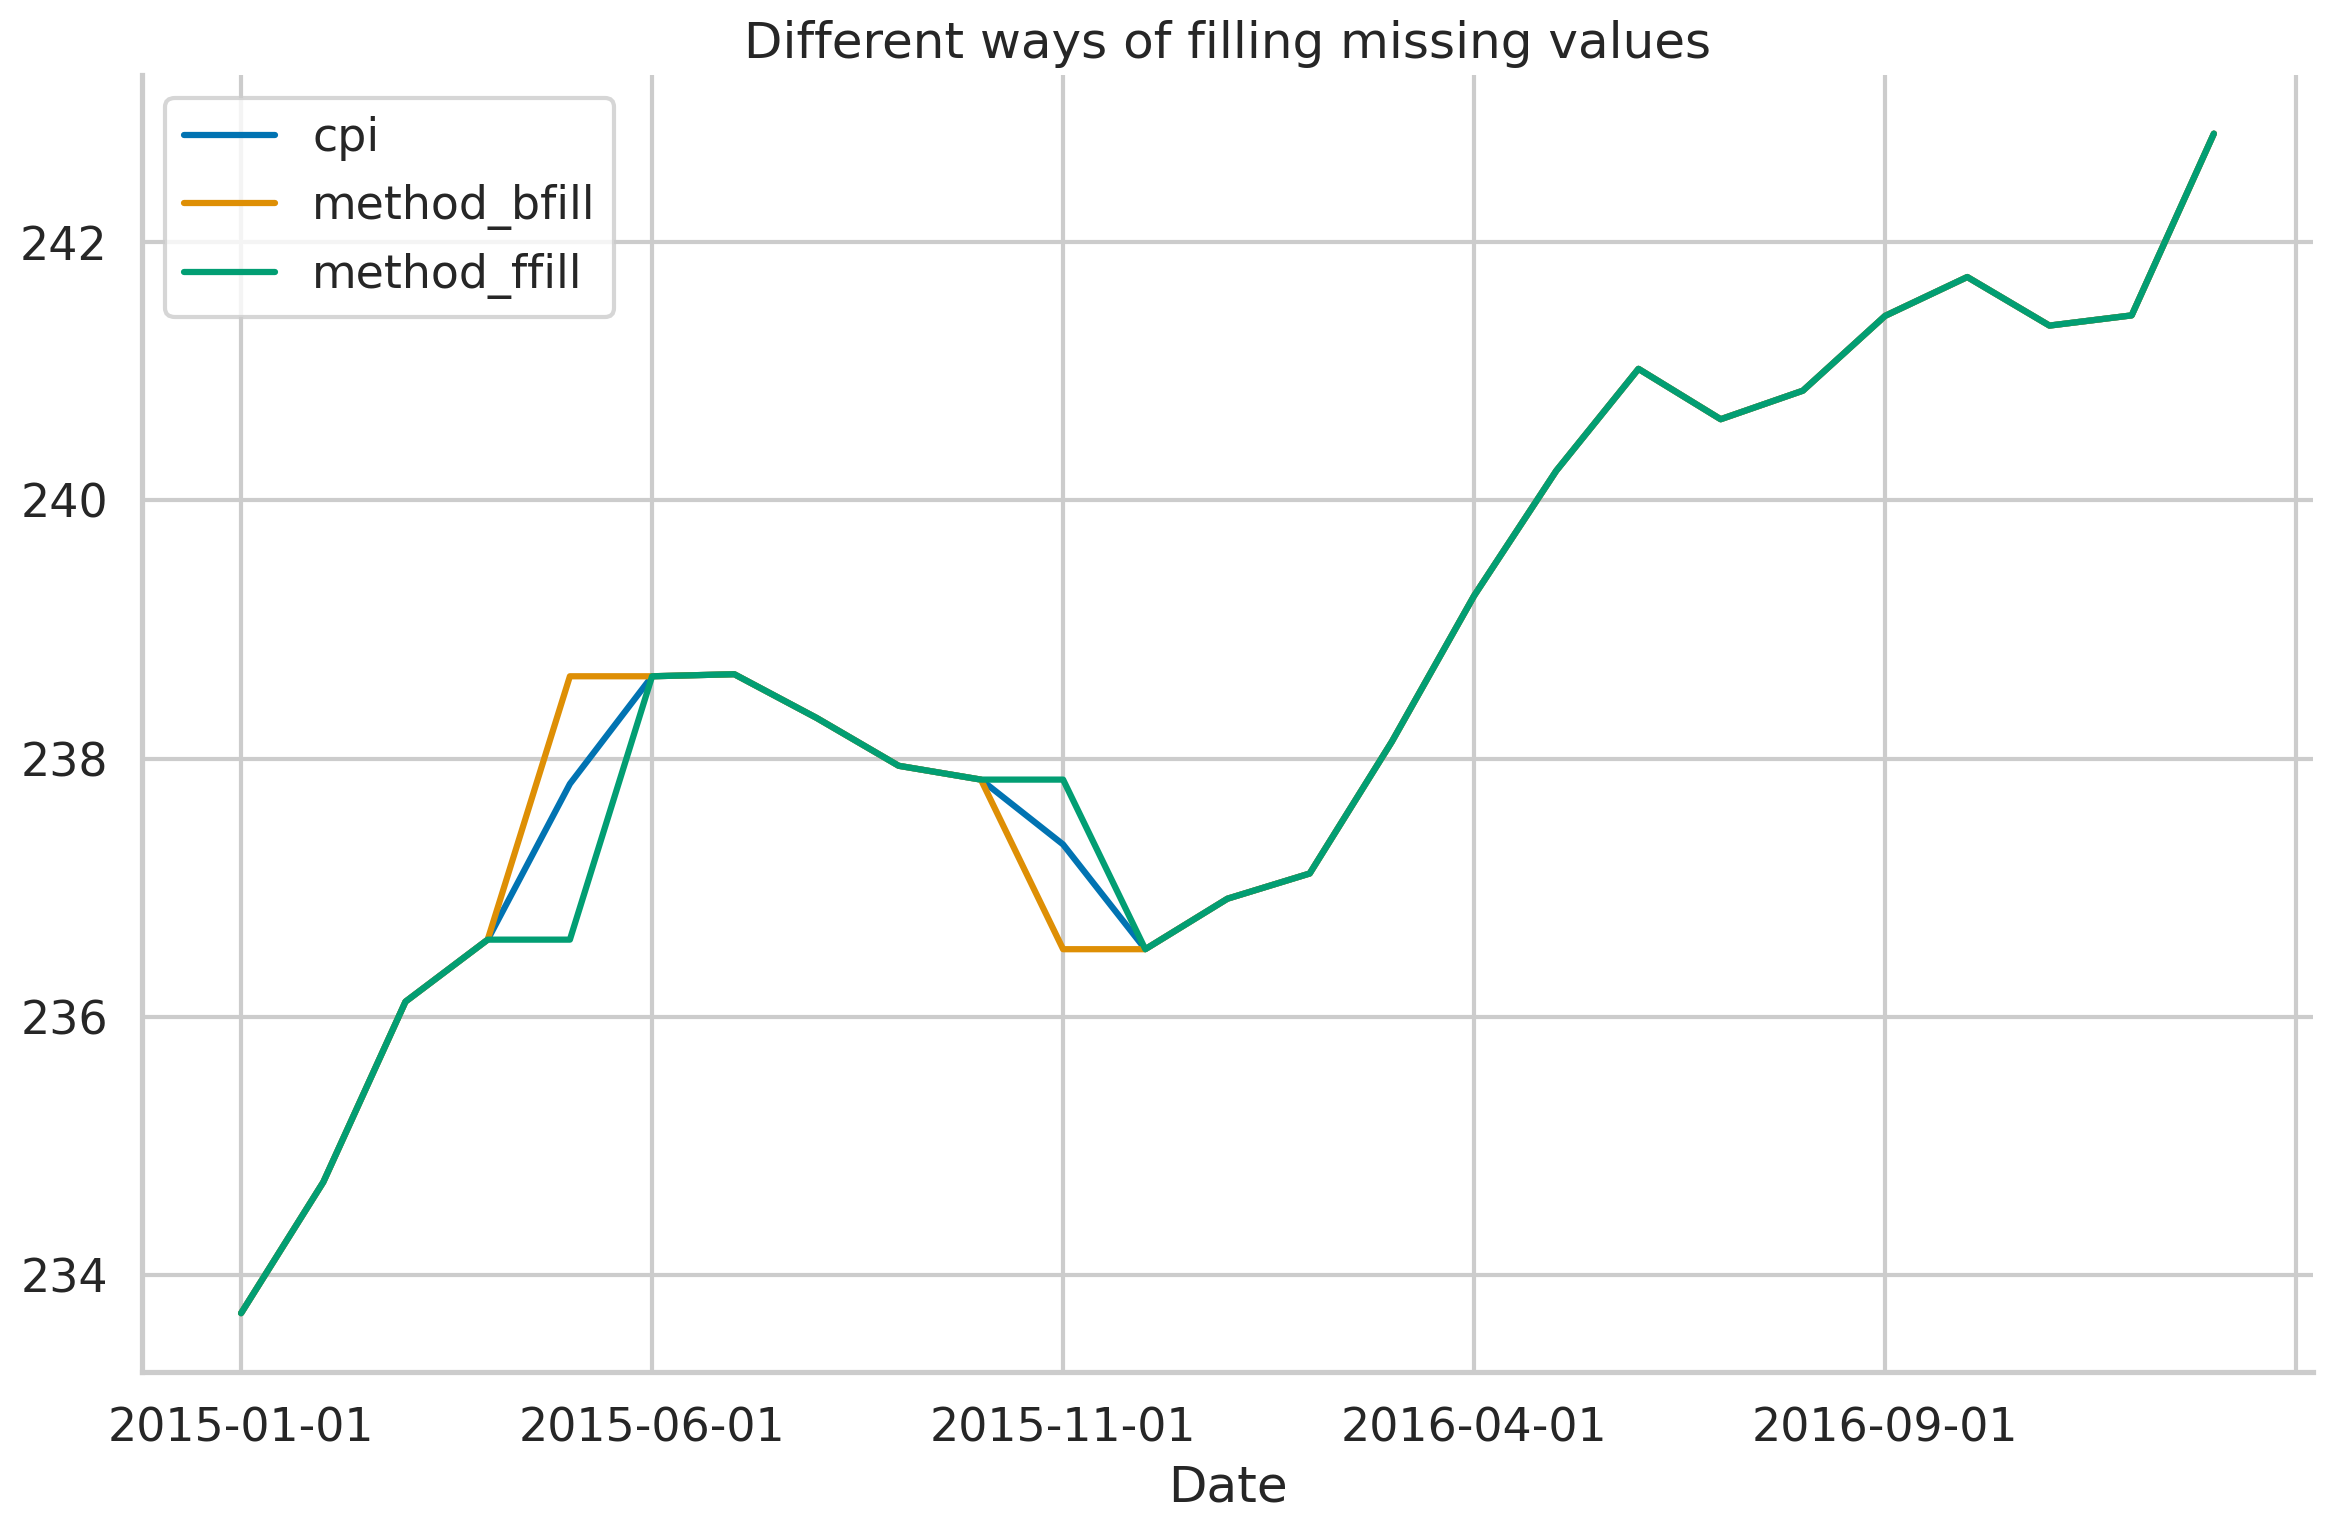

In [11]:
df.loc[:"2017-01-01"] \
  .drop(columns=["cpi_missing"]) \
  .plot(title="Different ways of filling missing values");

sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_2_8', dpi=200)

### There's more

- 이 레시피에서는 결측 데이터를 보간하는 몇 가지 간단한 방법을 탐구했습니다. 또 다른 가능성으로는 다양한 접근법이 있는 보간(interpolation)을 사용하는 것입니다. 이번 예제에서는 선형 보간법을 사용할 것입니다. 이용 가능한 보간 방법에 대한 자세한 내용은 pandas 문서(참고 섹션에 링크가 있습니다)를 참조하시기 바랍니다.

1. Use linear interpolation to fill the missing values:

In [15]:
df["method_interpolate"] = df[["cpi_missing"]].interpolate()

2. Inspect the results:

In [16]:
df.loc[rand_indices].sort_index()

,cpi,cpi_missing,method_bfill,method_ffill,method_interpolate
Date,,,,,
2015-05-01,237.805,NaN,238.638,236.599,237.6185
2015-11-01,237.336,NaN,236.525,237.838,237.1815
2018-05-01,251.588,NaN,251.989,250.546,251.2675
2020-10-01,260.388,NaN,260.229,260.280,260.2545
2021-09-01,274.310,NaN,276.589,273.567,275.0780


3. Plot the results:
- 선형 보간법은 알려진 관측값들을 직선으로 연결하여 결측값을 추정하는 방법입니다. 다음 그림에서 이 방법이 어떻게 적용되는지 확인할 수 있습니다.

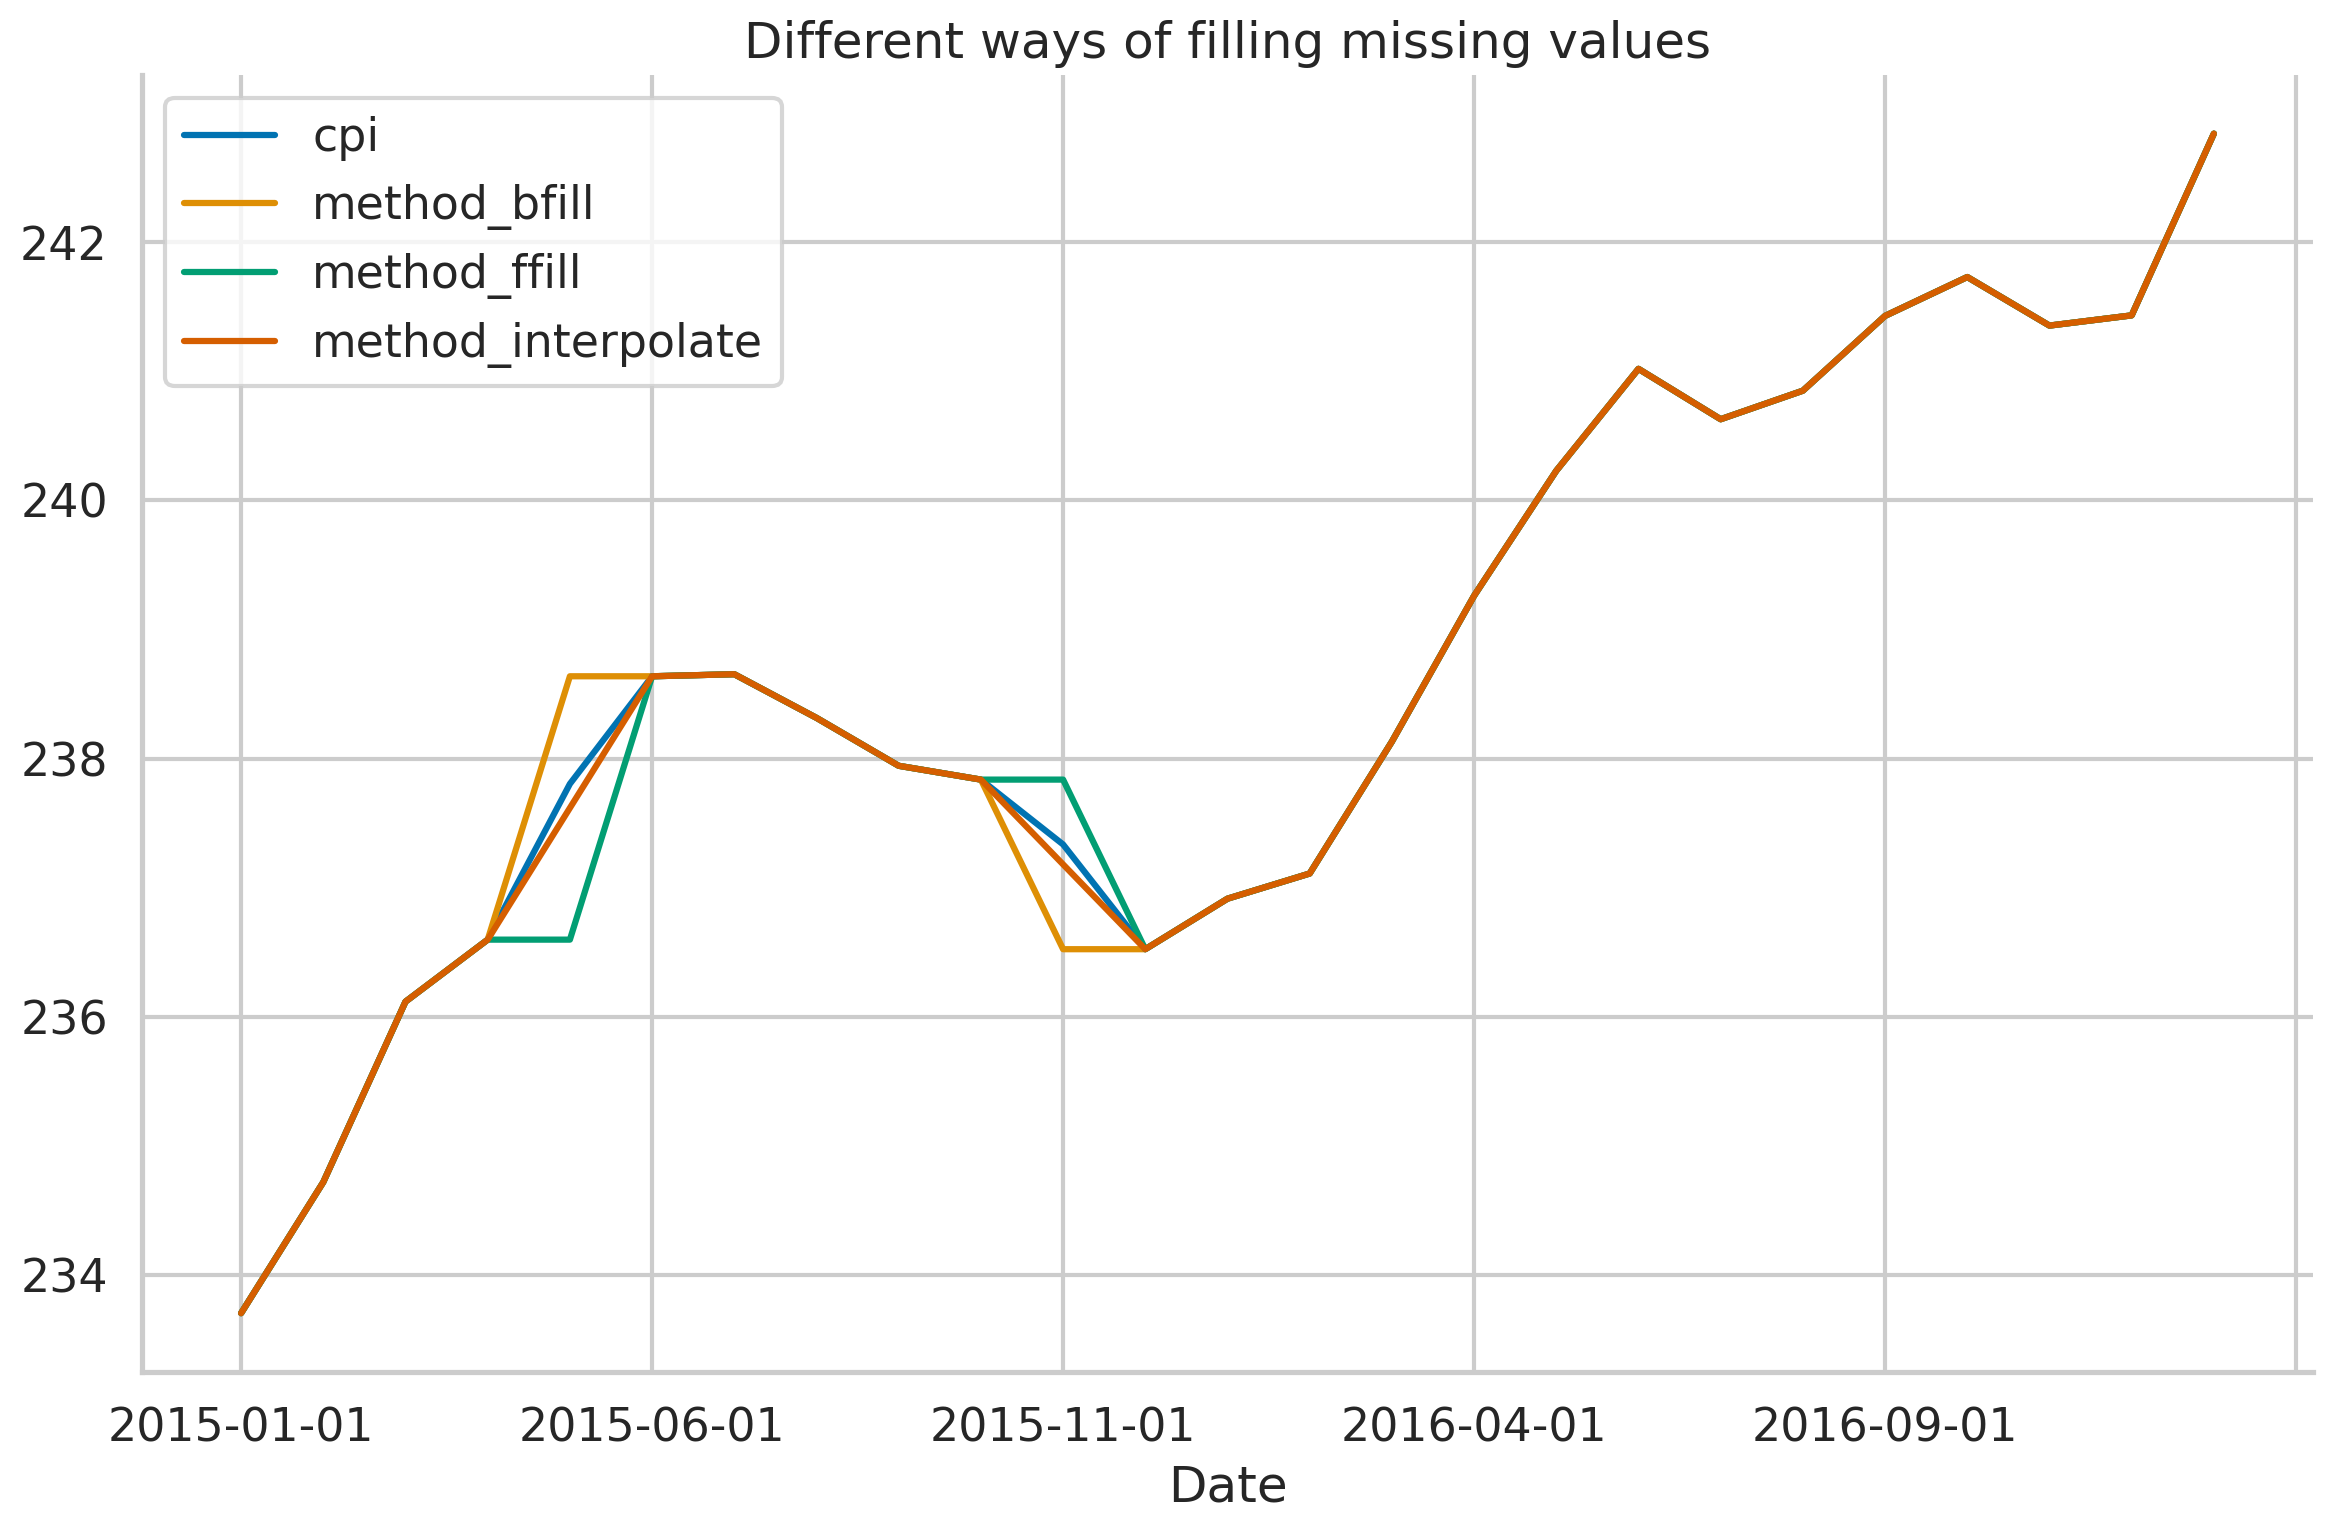

In [17]:
df.loc[:"2017-01-01"] \
  .drop(columns=["cpi_missing"]) \
  .plot(title="Different ways of filling missing values");

sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_2_10', dpi=200)

**시계열 데이터의 결측값 처리**:
   - 이번 레시피에서는 시계열 데이터의 결측값을 보간하는 방법을 다루었습니다. 
   - 선형 보간법 외에도 다양한 방법들이 존재하며, 예를 들어 최근 몇 개의 관측값의 **이동 평균**을 사용하여 결측값을 보간할 수도 있습니다.
**다양한 보간 방법**:
   - pandas 라이브러리에서 다양한 보간 방법을 사용할 수 있습니다. [pandas 공식 문서](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)에서 자세한 정보를 확인할 수 있습니다.
**추가 학습**:
   - 13장 "응용 머신 러닝: 신용 불이행 식별"에서는 다른 유형의 데이터셋에서 결측값 문제를 해결하는 방법에 대해 더 깊이 있게 다룰 예정입니다.

## 2.5 Converting currencies

금융 작업을 수행할 때 자주 접하게 될 또 다른 일반적인 전처리 단계는 통화 변환입니다. 여러 통화로 가격이 책정된 여러 자산을 보유한 포트폴리오를 가지고 있으며, 이 포트폴리오의 총 가치를 계산하고 싶다고 가정해 보세요. 가장 간단한 예는 미국과 유럽 주식일 것입니다. 이 레시피에서는 미국 달러(USD)에서 유로(EUR)로 주식 가격을 쉽게 변환하는 방법을 보여줍니다. 하지만, 동일한 단계로 어떤 통화 쌍도 변환할 수 있습니다.

### How to do it...

Execute the following steps to convert stock prices from USD to EUR:

1. Import the libraries:

In [1]:
# !pip install freecurrencyapi

In [14]:
import pandas as pd 
import yfinance as yf
from freecurrencyapi import Client
import os 

api_key = os.environ.get('FREECURRENCYAPI_KEY')
# Initialize the client with your API key
client = Client(api_key)

In [15]:
# import pandas as pd 
# import yfinance as yf
# from forex_python.converter import CurrencyRates

2. Download Apple's OHLC prices from January 2020:

In [16]:
df = yf.download("AAPL", 
                 start="2020-01-01", 
                 end="2020-01-31",
                 progress=False)
df = df.drop(columns=["Adj Close", "Volume"])
df.head()

,Open,High,Low,Close
Date,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502
2020-01-03,74.287498,75.144997,74.125000,74.357498
2020-01-06,73.447502,74.989998,73.187500,74.949997
2020-01-07,74.959999,75.224998,74.370003,74.597504
2020-01-08,74.290001,76.110001,74.290001,75.797501


3. Instantiate the `CurrencyRates` object:
- 환율을 개별적으로 다운로드해야 하기 때문에 대규모 데이터프레임에서는 확장성이 떨어질 수 있습니다. 또한, 주말의 환율 정보를 요청할 때 발생할 수 있는 오류를 처리해야 합니다.

In [17]:
# c = CurrencyRates()

In [27]:
# 특정 날짜의 환율을 가져오는 함수
def get_exchange_rate(date):
    # 날짜 객체를 'YYYY-MM-DD' 형식의 문자열로 변환
    date_str = date.strftime('%Y-%m-%d')
    
    # API를 호출하여 해당 날짜의 역사적 환율 데이터를 가져옴
    result = client.historical(date_str, base_currency='USD', currencies=['EUR'])
    print(date_str)
    print(result)
    
    # API 응답에 필요한 데이터가 있는지 확인
    if 'data' in result and date_str in result['data'] and 'EUR' in result['data'][date_str]:
        # 데이터가 있으면 해당 날짜의 EUR 환율을 반환
        return result['data'][date_str]['EUR']
    else:
        # 데이터가 없으면 메시지를 출력하고 None을 반환
        print(f"{date_str}에 대한 데이터가 없습니다.")
        return None

4. Download the USD/EUR rate for each required date:
- get_exchange_rate 메서드를 사용하여 주가가 있는 모든 날짜에 대해 USD/EUR 환율을 다운로드했습니다. 리스트 컴프리헨션을 사용해 결과를 새로운 열에 저장했습니다.

In [28]:
# df["usd_eur"] = [c.get_rate("USD", "EUR", date) for date in df.index]

In [29]:
# Get exchange rates
df["usd_eur"] = df.index.map(get_exchange_rate)

2020-01-02
{'data': {'2020-01-02': {'EUR': 0.89521}}}
2020-01-03
{'data': {'2020-01-03': {'EUR': 0.89608}}}
2020-01-06
{'data': {'2020-01-06': {'EUR': 0.89316}}}
2020-01-07
{'data': {'2020-01-07': {'EUR': 0.89654}}}
2020-01-08
{'data': {'2020-01-08': {'EUR': 0.89989}}}
2020-01-09
{'data': {'2020-01-09': {'EUR': 0.90021}}}
2020-01-10
{'data': {'2020-01-10': {'EUR': 0.89932}}}
2020-01-13
{'data': {'2020-01-13': {'EUR': 0.89806}}}
2020-01-14
{'data': {'2020-01-14': {'EUR': 0.89862}}}
2020-01-15
{'data': {'2020-01-15': {'EUR': 0.89667}}}
2020-01-16
{'data': {'2020-01-16': {'EUR': 0.89793}}}
2020-01-17
{'data': {'2020-01-17': {'EUR': 0.90168}}}
2020-01-21
{'data': {'2020-01-21': {'EUR': 0.90212}}}
2020-01-22
{'data': {'2020-01-22': {'EUR': 0.90125}}}
2020-01-23
{'data': {'2020-01-23': {'EUR': 0.9046}}}
2020-01-24
{'data': {'2020-01-24': {'EUR': 0.90704}}}
2020-01-27
{'data': {'2020-01-27': {'EUR': 0.90752}}}
2020-01-28
{'message': "API rate limit exceeded for 'quota'"}
2020-01-28에 대한 데이터가 없

In [30]:
df["usd_eur"] 

Date
2020-01-02    0.89521
2020-01-03    0.89608
2020-01-06    0.89316
2020-01-07    0.89654
2020-01-08    0.89989
2020-01-09    0.90021
2020-01-10    0.89932
2020-01-13    0.89806
2020-01-14    0.89862
2020-01-15    0.89667
2020-01-16    0.89793
2020-01-17    0.90168
2020-01-21    0.90212
2020-01-22    0.90125
2020-01-23    0.90460
2020-01-24    0.90704
2020-01-27    0.90752
2020-01-28        NaN
2020-01-29    0.90792
2020-01-30    0.90674
Name: usd_eur, dtype: float64

In [31]:
df

,Open,High,Low,Close,usd_eur
Date,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,0.89521
2020-01-03,74.287498,75.144997,74.125000,74.357498,0.89608
2020-01-06,73.447502,74.989998,73.187500,74.949997,0.89316
2020-01-07,74.959999,75.224998,74.370003,74.597504,0.89654
2020-01-08,74.290001,76.110001,74.290001,75.797501,0.89989
2020-01-09,76.809998,77.607498,76.550003,77.407501,0.90021
2020-01-10,77.650002,78.167503,77.062500,77.582497,0.89932
2020-01-13,77.910004,79.267502,77.787498,79.239998,0.89806
2020-01-14,79.175003,79.392502,78.042503,78.169998,0.89862


5. Convert the prices in USD to EUR:

- DataFrame의 각 열에 대해 USD 가격에 환율을 곱한 후, 결과를 _EUR 하위스크립트가 붙은 새로운 열에 저장했습니다.

In [32]:
for column in df.columns[:-1]:
    df[f"{column}_EUR"] = df[column] * df["usd_eur"]
df.tail().round(3)

,Open,High,Low,Close,usd_eur,Open_EUR,High_EUR,Low_EUR,Close_EUR
Date,,,,,,,,,
2020-01-24,80.062,80.832,79.380,79.577,0.907,72.620,73.318,72.001,72.180
2020-01-27,77.515,77.942,76.220,77.238,0.908,70.346,70.734,69.171,70.095
2020-01-28,78.150,79.600,78.048,79.423,NaN,NaN,NaN,NaN,NaN
2020-01-29,81.113,81.963,80.345,81.085,0.908,73.644,74.415,72.947,73.619
2020-01-30,80.135,81.022,79.688,80.967,0.907,72.662,73.466,72.256,73.416


In [33]:
df

,Open,High,Low,Close,usd_eur,Open_EUR,High_EUR,Low_EUR,Close_EUR
Date,,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,0.89521,66.299250,67.275033,66.064261,67.219082
2020-01-03,74.287498,75.144997,74.125000,74.357498,0.89608,66.567542,67.335929,66.421930,66.630267
2020-01-06,73.447502,74.989998,73.187500,74.949997,0.89316,65.600371,66.978066,65.368147,66.942339
2020-01-07,74.959999,75.224998,74.370003,74.597504,0.89654,67.204638,67.442220,66.675682,66.879646
2020-01-08,74.290001,76.110001,74.290001,75.797501,0.89989,66.852829,68.490628,66.852829,68.209413
2020-01-09,76.809998,77.607498,76.550003,77.407501,0.90021,69.145128,69.863046,68.911078,69.683007
2020-01-10,77.650002,78.167503,77.062500,77.582497,0.89932,69.832199,70.297599,69.303848,69.771491
2020-01-13,77.910004,79.267502,77.787498,79.239998,0.89806,69.967858,71.186973,69.857841,71.162272
2020-01-14,79.175003,79.392502,78.042503,78.169998,0.89862,71.148241,71.343690,70.130554,70.245124


### There's more

- forex_python 라이브러리를 사용하여 여러 통화에 대한 환율을 한 번에 쉽게 다운로드할 수 있습니다. 이를 위해 get_rates 메서드를 사용할 수 있습니다. 다음 코드 조각에서는 USD에서 31개의 사용 가능한 통화로의 현재 환율을 다운로드합니다. 이전과 마찬가지로 관심 있는 날짜를 지정할 수 있습니다. 아래 코드는 USD에서 31개의 사용 가능한 통화로의 현재 환율을 가져오는 예시입니다.
- forex_python 라이브러리 구동에 문제가 있어 아래는 실행 하지 않습니다.

1. Get the USD exchange rates to 31 available currencies:

In [44]:
usd_rates = c.get_rates("USD")
usd_rates

{'EUR': 0.8815232722143864,
 'JPY': 115.10930888575459,
 'BGN': 1.7240832157968968,
 'CZK': 21.573519040902678,
 'DKK': 6.557475317348377,
 'GBP': 0.7357457686882933,
 'HUF': 314.92418899858956,
 'PLN': 4.00925599435825,
 'RON': 4.360719322990127,
 'SEK': 9.313998589562763,
 'CHF': 0.9195169252468264,
 'ISK': 124.47108603667135,
 'NOK': 8.844763751763047,
 'HRK': 6.643335684062059,
 'RUB': 80.11204160789843,
 'TRY': 13.8285437235543,
 'AUD': 1.3744710860366711,
 'BRL': 5.007757404795486,
 'CAD': 1.2688645980253879,
 'CNY': 6.317789139633286,
 'HKD': 7.8040373765867415,
 'IDR': 14342.489421720733,
 'INR': 74.58876939351198,
 'KRW': 1190.259167842031,
 'MXN': 20.193846967559942,
 'MYR': 4.185472496473907,
 'NZD': 1.470292665726375,
 'PHP': 51.11071932299012,
 'SGD': 1.3445874471086037,
 'THB': 32.264633286318755,
 'ZAR': 15.030677009873058}

In [45]:
len(usd_rates)

31

2. Download the USD/EUR exchange rate from Yahoo Finance:

In [46]:
df = yf.download("USDEUR=X", 
                 start="2000-01-01", 
                 end="2010-12-31",
                 progress=False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,0.83098,0.83724,0.83056,0.83577,0.83577,0
2003-12-02,0.83605,0.83710,0.82583,0.82720,0.82720,0
2003-12-03,0.82713,0.82802,0.82440,0.82488,0.82488,0
2003-12-04,0.82508,0.83029,0.82345,0.82775,0.82775,0
2003-12-05,0.82795,0.82878,0.82028,0.82055,0.82055,0


## 2.6 Different ways of aggregating trade data

머신 러닝 모델을 구축하거나 거래 전략을 설계하기 전에 신뢰할 수 있는 데이터를 수집하고, 이를 분석 및 모델링에 적합한 형식으로 집계하는 것이 중요합니다. 금융 자산의 가격 움직임을 나타내는 데이터 표현 방식인 "바(bar)"는 이러한 데이터를 집계하는 대표적인 방법입니다. 가장 일반적인 방식은 특정 시간 간격(월, 일, 또는 초단위 등)으로 데이터를 샘플링하는 "시간 바(time bars)"입니다. 그러나 시간 바에는 몇 가지 단점이 있습니다. 시간 바는 시장의 실제 활동 속도를 반영하지 못하고, 낮은 활동 기간(예: 정오)을 과도하게 샘플링하거나, 높은 활동 기간(예: 시장 개장 및 마감 전후)을 적게 샘플링할 수 있습니다. 또한, 시간 기반 바는 시계열 데이터의 통계적 특성(예: 자기상관, 이분산성, 수익률의 비정규성)을 제대로 반영하지 못하며, 조작에 취약할 수 있습니다(예: 아이스버그 주문).

**아이스버그 주문**은 큰 주문을 여러 작은 제한 주문으로 나누어 실제 주문량을 숨기는 방법입니다. 이런 문제를 해결하고 경쟁 우위를 확보하기 위해 실무자들은 다양한 다른 방식의 집계를 사용합니다. 각 바가 동일한 양의 정보를 포함하도록 하는 것이 이상적입니다. 이러한 대안으로는 다음과 같은 방법들이 있습니다:

이러한 문제를 해결하고 경쟁 우위를 확보하기 위해 실무자들은 다른 종류의 집계 방식을 사용하기도 합니다. 이상적으로는 각 바(bar)마다 동일한 양의 정보를 포함하는 것이 바람직합니다. 이들이 사용하는 대안 중 일부는 다음과 같습니다:

- 틱 바(Tick bars): 금융 시장에서 거래를 종종 "틱(tick)"이라고 부르는데, 이와 관련된 집계 방식입니다. 이 방식에서는 미리 정의된 수의 거래가 발생할 때마다 OHLCV 바를 샘플링합니다.
- 거래량 바(Volume bars): 미리 정의된 거래량(예: 주식, 코인 등)이 교환될 때마다 바를 샘플링합니다.
- 달러 바(Dollar bars): 미리 정의된 달러 금액이 교환될 때마다 바를 샘플링합니다. 물론 다른 통화도 사용할 수 있습니다.

이들 각각의 집계 방식은 강점과 약점이 있으므로, 이를 이해하고 있어야 합니다. 틱 바는 시장의 실제 활동과 변동성을 더 잘 추적할 수 있습니다. 하지만 하나의 거래가 특정 자산의 다양한 수량을 포함할 수 있기 때문에, 한 주를 매수하는 주문이 10,000주의 주문과 동일하게 처리되는 문제가 발생할 수 있습니다. 거래량 바는 이 문제를 해결하려는 시도이지만, 자산 가격이 크게 변동하거나 주식 분할이 발생하는 상황에서는 올바르게 반영되지 않아, 이런 상황에 영향을 받는 기간 간의 비교에서 신뢰할 수 없습니다. 여기서 세 번째 유형인 달러 바가 등장합니다. 달러 바는 종종 가격 데이터를 집계하는 가장 강력한 방법으로 간주됩니다. 
- 첫째, 달러 바는 가격 변동성과의 간극을 메우는 데 도움을 주며, 이는 특히 암호화폐와 같은 변동성이 큰 시장에서 중요합니다.
- 둘째, 달러 단위로 샘플링하면 정보의 일관성을 유지하는 데 유리합니다.
- 또 달러 바는 발행된 주식 수에 영향을 받지 않기 때문에 주식 분할, 기업 자사주 매입, 신규 주식 발행 등의 영향을 받지 않습니다.

금융 데이터를 단순히 시간에 따라 나열하는 대신, 실제 시장 활동을 더 잘 반영하는 방법으로 데이터를 묶어 정리하면, 더 정확한 분석과 예측이 가능하다는 것입니다. 이를 통해 투자자나 트레이더는 시장의 흐름을 더 잘 파악하고, 경쟁 우위를 확보할 수 있습니다.
이 레시피에서는 Binance라는 가장 인기 있는 암호화폐 거래소 중 하나에서 제공하는 거래 데이터를 사용하여 위에서 언급한 네 가지 종류의 바를 생성하는 방법을 배웁니다. 주식 데이터와 비교할 때 암호화폐 데이터는 무료로 쉽게 얻을 수 있기 때문에 이를 사용하지만, 제시된 방법론은 다른 자산 클래스에도 동일하게 적용됩니다.

### How to do it...

1. Import the libraries:

In [7]:
# !pip install binance-connector

In [8]:
from binance.spot import Spot as Client
import pandas as pd 
import numpy as np

2. Instantiate the Binance client and download the last 500 `BTCEUR` trades:

In [9]:
spot_client = Client(base_url="https://api3.binance.com")
r = spot_client.trades("BTCEUR")

3. Process the downloaded trades into a `pandas` DataFrame:

In [10]:
df = (
    pd.DataFrame(r)
    .drop(columns=["isBuyerMaker", "isBestMatch"])
)
df["time"] = pd.to_datetime(df["time"], unit="ms")

for column in ["price", "qty", "quoteQty"]:
    df[column] = pd.to_numeric(df[column])
df

,id,price,qty,quoteQty,time
0,136062735,55469.93,0.00079,43.821245,2024-08-13 21:56:56.000
1,136062736,55485.82,0.00027,14.981171,2024-08-13 21:57:02.394
2,136062737,55485.82,0.00017,9.432589,2024-08-13 21:57:02.395
3,136062738,55485.82,0.00021,11.652022,2024-08-13 21:57:02.405
4,136062739,55501.58,0.00036,19.980569,2024-08-13 21:57:14.356
...,...,...,...,...,...
495,136063230,55127.56,0.00153,84.345167,2024-08-13 23:21:05.354
496,136063231,55154.23,0.00151,83.282887,2024-08-13 23:21:19.050
497,136063232,55154.23,0.00165,91.004480,2024-08-13 23:21:19.050
498,136063233,55150.98,0.01296,714.756701,2024-08-13 23:21:19.050


우리는 BTCEUR 시장에서 500건의 거래가 약 9분 동안 발생한 것을 확인할 수 있습니다. 더 인기 있는 시장의 경우, 이 시간 창은 크게 줄어들 수 있습니다. `qty` 열에는 거래된 BTC의 수량이 포함되어 있으며, `quoteQty` 열에는 거래된 수량의 EUR 가격이 포함되어 있습니다. 이는 `price` 열에 `qty` 열을 곱한 것과 같습니다.

4. Define a function aggregating the raw trades information:

In [11]:
# def get_bars(df, add_time=False):
#     """[summary]

#     Args:
#         df ([type]): [description]

#     Returns:
#         [type]: [description]
#     """
#     ohlc = df["price"].ohlc()
#     vwap = (
#         df.apply(lambda x: np.average(x["price"], weights=x["qty"]))
#         .to_frame("vwap")
#     )
#     vol = df["qty"].sum().to_frame("vol")
#     cnt = df["qty"].size().to_frame("cnt")
    
#     if add_time:
#         time = df["time"].last().to_frame("time")
#         res = pd.concat([time, ohlc, vwap, vol, cnt], axis=1)
#     else:
#         res = pd.concat([ohlc, vwap, vol, cnt], axis=1)
#     return res

In [30]:
def get_bars(grouped_df, add_time=False):
    """
    그룹화된 데이터프레임에서 OHLC, VWAP, 거래량, 거래 횟수를 계산합니다.

    Args:
        grouped_df (pd.DataFrameGroupBy): 그룹화된 거래 데이터
        add_time (bool): 결과에 시간 열을 추가할지 여부

    Returns:
        pd.DataFrame: 계산된 결과를 포함하는 데이터프레임
    """
    def agg_func(group):
        if len(group) == 0:
            return pd.Series({
                'open': np.nan, 'high': np.nan, 'low': np.nan, 'close': np.nan,
                'vwap': np.nan, 'vol': 0, 'cnt': 0,
                'time': pd.NaT  # 빈 그룹에 대한 시간 정보 추가
            })
        
        result = pd.Series()
        result['open'] = group['price'].iloc[0]
        result['high'] = group['price'].max()
        result['low'] = group['price'].min()
        result['close'] = group['price'].iloc[-1]
        
        total_volume = group['qty'].sum()
        if total_volume > 0:
            result['vwap'] = (group['price'] * group['qty']).sum() / total_volume
        else:
            result['vwap'] = np.nan
        
        result['vol'] = total_volume
        result['cnt'] = len(group)
        result['time'] = group.index[-1]  # 시간 정보를 여기서 추가
        
        return result

    # 경고를 피하기 위해 include_groups=False 옵션을 추가합니다
    bars = grouped_df.apply(agg_func, include_groups=False)
    
    if not add_time:
        bars = bars.drop('time', axis=1)
    
    return bars

5. Get time bars:

In [31]:
df_grouped_time = df.groupby(pd.Grouper(key="time", freq="1Min"))
time_bars = get_bars(df_grouped_time)
time_bars

,open,high,low,close,vwap,vol,cnt
time,,,,,,,
2024-08-13 21:56:00,55469.93,55469.93,55469.93,55469.93,55469.930000,0.00079,1.0
2024-08-13 21:57:00,55485.82,55502.31,55485.82,55502.31,55495.348678,0.00454,12.0
2024-08-13 21:58:00,55502.34,55550.51,55502.34,55550.51,55536.643041,0.28152,8.0
2024-08-13 21:59:00,55569.20,55572.62,55566.19,55566.19,55569.225577,0.07045,6.0
2024-08-13 22:00:00,55579.80,55579.80,55551.09,55551.09,55552.383243,0.00222,6.0
...,...,...,...,...,...,...,...
2024-08-13 23:17:00,55134.94,55156.71,55134.94,55156.71,55145.084559,0.00340,4.0
2024-08-13 23:18:00,55152.18,55152.21,55152.09,55152.21,55152.160000,0.00960,3.0
2024-08-13 23:19:00,55142.81,55145.12,55139.64,55139.64,55140.230248,0.00363,4.0


6. Get tick bars:
- 우리가 의도한 대로, 각 그룹이 정확히 50건의 거래를 포함하고 있는 것을 확인할 수 있습니다.

In [32]:
bar_size = 50 
df["tick_group"] = (
    pd.Series(list(range(len(df))))
    .div(bar_size)
    .apply(np.floor)
    .astype(int)
    .values
)
df_grouped_ticks = df.groupby("tick_group")
tick_bars = get_bars(df_grouped_ticks, add_time=True)
tick_bars

,open,high,low,close,vwap,vol,cnt,time
tick_group,,,,,,,,
0,55469.93,55606.62,55400.22,55400.22,55515.178921,0.51213,50.0,49.0
1,55400.22,55400.23,55288.15,55293.03,55350.402277,1.52740,50.0,99.0
2,55293.03,55311.91,55185.42,55311.91,55247.347637,0.53899,50.0,149.0
3,55328.96,55328.96,55166.77,55203.48,55248.464659,0.41061,50.0,199.0
4,55215.81,55264.22,55177.81,55183.39,55215.826007,0.74299,50.0,249.0
5,55183.39,55214.36,55062.95,55192.60,55166.520163,0.55108,50.0,299.0
6,55208.09,55258.63,55174.62,55204.84,55211.116063,0.32118,50.0,349.0
7,55204.82,55240.48,55117.35,55130.56,55156.349219,0.42391,50.0,399.0
8,55130.56,55168.54,55110.85,55112.25,55123.362675,0.22673,50.0,449.0


7. Get volume bars:
- 모든 바(bar)가 대략 동일한 거래량을 포함하고 있는 것을 확인할 수 있습니다. 마지막 바는 약간 작지만, 이는 500건의 거래에서 총 거래량이 충분하지 않았기 때문입니다.

In [33]:
bar_size = 1 
df["cum_qty"] = df["qty"].cumsum()
df["vol_group"] = (
    df["cum_qty"]
    .div(bar_size)
    .apply(np.floor)
    .astype(int)
    .values
)
df_grouped_ticks = df.groupby("vol_group")
volume_bars = get_bars(df_grouped_ticks, add_time=True)
volume_bars

,open,high,low,close,vwap,vol,cnt,time
vol_group,,,,,,,,
0,55469.93,55606.62,55350.47,55350.49,55453.268893,0.93482,73.0,72.0
1,55350.49,55350.49,55288.15,55304.06,55341.712484,1.05735,25.0,97.0
2,55304.06,55328.96,55166.77,55215.81,55250.101924,0.99716,103.0,200.0
3,55216.00,55264.22,55062.95,55182.14,55195.941424,0.98353,95.0,295.0
4,55187.43,55258.63,55117.35,55161.14,55183.904428,1.00630,91.0,386.0
5,55163.92,55192.50,55077.43,55154.22,55127.895593,0.51322,113.0,499.0


8. Get dollar bars:

In [34]:
bar_size = 50000 
df["cum_value"] = df["quoteQty"].cumsum()
df["value_group"] = (
    df["cum_value"]
    .div(bar_size)
    .apply(np.floor)
    .astype(int)
    .values
)
df_grouped_ticks = df.groupby("value_group")
dollar_bars = get_bars(df_grouped_ticks, add_time=True)
dollar_bars

,open,high,low,close,vwap,vol,cnt,time
value_group,,,,,,,,
0,55469.93,55606.62,55350.47,55350.49,55460.480230,0.87353,68.0,67.0
1,55350.49,55350.49,55288.15,55288.15,55347.766711,0.91813,22.0,89.0
2,55326.70,55328.96,55185.42,55253.76,55268.904023,0.91215,80.0,169.0
3,55252.18,55278.26,55166.77,55181.45,55228.377730,0.87443,65.0,234.0
4,55183.39,55258.63,55062.95,55257.60,55178.967062,0.94181,84.0,318.0
5,55258.54,55258.54,55077.43,55130.23,55148.239669,0.82629,162.0,480.0
6,55135.78,55156.71,55127.56,55154.22,55138.870269,0.14604,19.0,499.0
